In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nba-2022-UTC.csv')

In [3]:
data

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,1,1,18/10/2022 23:30,TD Garden,Boston Celtics,Philadelphia 76ers,126 - 117
1,2,1,19/10/2022 02:00,Chase Center,Golden State Warriors,Los Angeles Lakers,123 - 109
2,3,1,19/10/2022 23:00,Little Caesars Arena,Detroit Pistons,Orlando Magic,113 - 109
3,4,1,19/10/2022 23:00,Gainbridge Fieldhouse,Indiana Pacers,Washington Wizards,107 - 114
4,5,1,19/10/2022 23:30,State Farm Arena,Atlanta Hawks,Houston Rockets,117 - 107
...,...,...,...,...,...,...,...
1225,1226,24,09/04/2023 19:30,Paycom Center,Oklahoma City Thunder,Memphis Grizzlies,NaN
1226,1227,24,09/04/2023 19:30,Ball Arena,Denver Nuggets,Sacramento Kings,NaN
1227,1228,24,09/04/2023 19:30,Crypto.com Arena,Los Angeles Lakers,Utah Jazz,NaN
1228,1229,24,09/04/2023 19:30,Footprint Center,Phoenix Suns,LA Clippers,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Match Number  1230 non-null   int64 
 1   Round Number  1230 non-null   int64 
 2   Date          1230 non-null   object
 3   Location      1230 non-null   object
 4   Home Team     1230 non-null   object
 5   Away Team     1230 non-null   object
 6   Result        820 non-null    object
dtypes: int64(2), object(5)
memory usage: 67.4+ KB


In [5]:
df = data.copy()

In [6]:
day_and_time = df['Date'].apply(lambda x: x.split(' '))

In [7]:
day = []
time = []
for i in day_and_time:
    day.append(i[0])
    time.append(i[1])
df['Day'] = day
df['Time'] = time

In [8]:
df['Result'] = df['Result'].astype(str) 
sep_result = df['Result'].apply(lambda x: x.split('-'))

home_team_result = []
away_team_result = []
for i in sep_result:
    if len(i) > 1:
        home_team_result.append(i[0])
        away_team_result.append(i[1])
    else:
        home_team_result.append('nan')
        away_team_result.append('nan')
df['Home_result'] = home_team_result
df['Away_result'] = away_team_result

In [9]:
df_clean_reg = df.drop(['Location','Match Number','Date','Result'], axis=1)
df_clean_reg = df_clean_reg[(df_clean_reg['Home_result'] != 'nan') & (df_clean_reg['Away_result'] != 'nan')]
# df_clean_reg[['Home_result','Away_result']] = df_clean_reg[['Home_result','Away_result']].astype(float)

In [10]:
df_clean_reg

,Round Number,Home Team,Away Team,Day,Time,Home_result,Away_result
0,1,Boston Celtics,Philadelphia 76ers,18/10/2022,23:30,126,117
1,1,Golden State Warriors,Los Angeles Lakers,19/10/2022,02:00,123,109
2,1,Detroit Pistons,Orlando Magic,19/10/2022,23:00,113,109
3,1,Indiana Pacers,Washington Wizards,19/10/2022,23:00,107,114
4,1,Atlanta Hawks,Houston Rockets,19/10/2022,23:30,117,107
...,...,...,...,...,...,...,...
816,16,Brooklyn Nets,Phoenix Suns,08/02/2023,00:30,112,116
817,16,New Orleans Pelicans,Atlanta Hawks,08/02/2023,00:30,116,107
818,16,Memphis Grizzlies,Chicago Bulls,08/02/2023,01:00,104,89
819,16,Denver Nuggets,Minnesota Timberwolves,08/02/2023,03:00,146,112


In [11]:
df_clean_reg[['Home_result','Away_result']] = df_clean_reg[['Home_result','Away_result']].astype(float)

In [12]:
df_clean_reg['Points'] = df_clean_reg['Home_result'] + df_clean_reg['Away_result']

In [13]:
df_clean_reg

,Round Number,Home Team,Away Team,Day,Time,Home_result,Away_result,Points
0,1,Boston Celtics,Philadelphia 76ers,18/10/2022,23:30,126.0,117.0,243.0
1,1,Golden State Warriors,Los Angeles Lakers,19/10/2022,02:00,123.0,109.0,232.0
2,1,Detroit Pistons,Orlando Magic,19/10/2022,23:00,113.0,109.0,222.0
3,1,Indiana Pacers,Washington Wizards,19/10/2022,23:00,107.0,114.0,221.0
4,1,Atlanta Hawks,Houston Rockets,19/10/2022,23:30,117.0,107.0,224.0
...,...,...,...,...,...,...,...,...
816,16,Brooklyn Nets,Phoenix Suns,08/02/2023,00:30,112.0,116.0,228.0
817,16,New Orleans Pelicans,Atlanta Hawks,08/02/2023,00:30,116.0,107.0,223.0
818,16,Memphis Grizzlies,Chicago Bulls,08/02/2023,01:00,104.0,89.0,193.0
819,16,Denver Nuggets,Minnesota Timberwolves,08/02/2023,03:00,146.0,112.0,258.0


In [14]:
df_clean_reg.describe()

,Round Number,Home_result,Away_result,Points
count,820.000000,820.000000,820.000000,820.000000
mean,8.263415,115.808537,112.828049,228.636585
std,4.643467,11.771478,11.224143,18.767575
min,1.000000,82.000000,81.000000,169.000000
25%,4.000000,108.000000,105.000000,216.000000
50%,8.000000,116.000000,113.000000,229.000000
75%,12.000000,124.000000,121.000000,241.000000
max,16.000000,153.000000,150.000000,284.000000


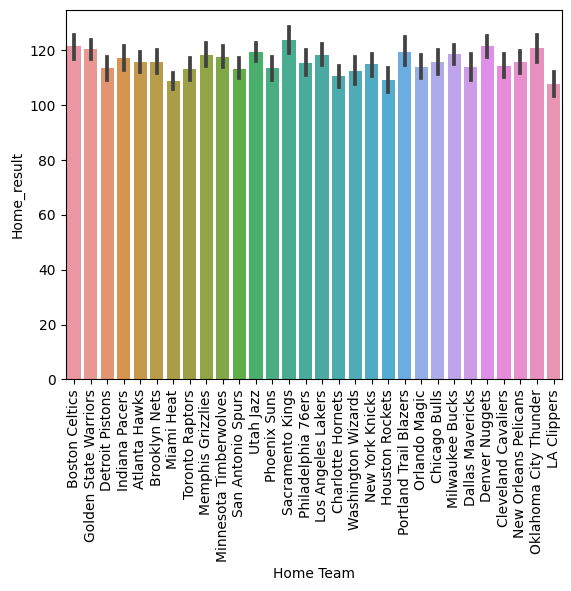

In [15]:
sns.barplot(data=df_clean_reg, x='Home Team', y = 'Home_result')
plt.xticks(rotation=90)
plt.show()

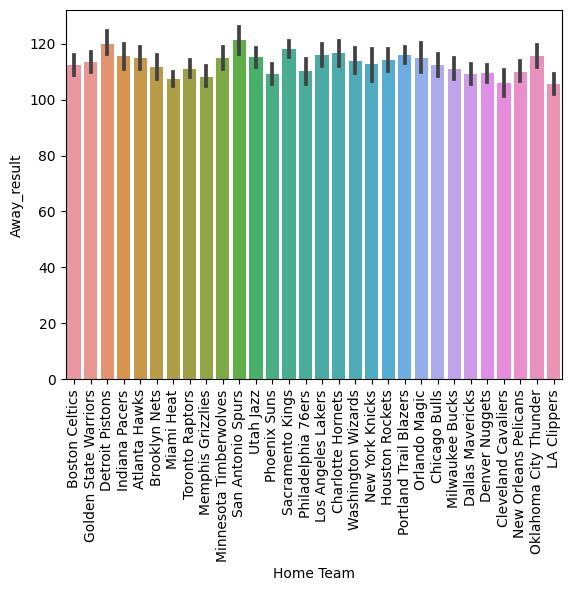

In [16]:
sns.barplot(data=df_clean_reg, x='Home Team', y = 'Away_result')
plt.xticks(rotation=90)
plt.show()

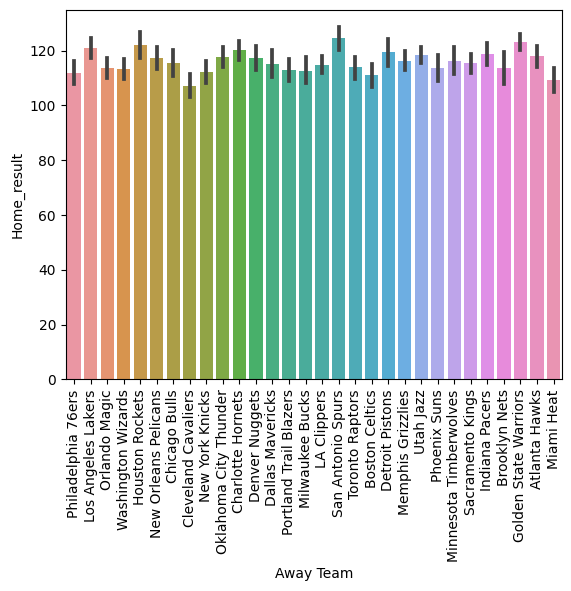

In [17]:
sns.barplot(data=df_clean_reg, x='Away Team', y = 'Home_result')
plt.xticks(rotation=90)
plt.show()

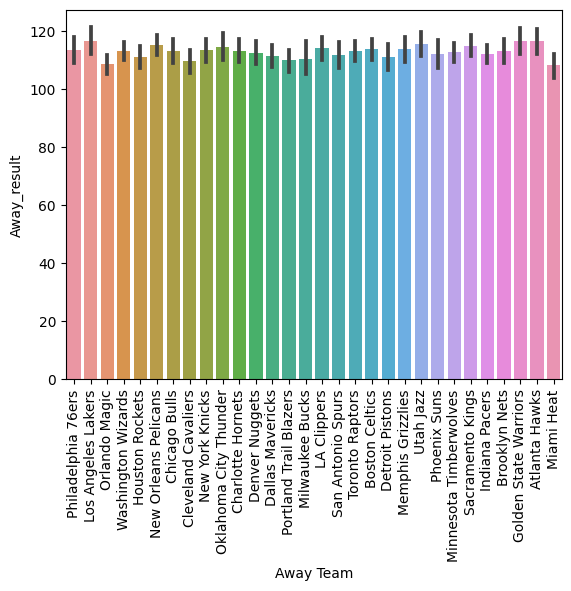

In [18]:
sns.barplot(data=df_clean_reg, x='Away Team', y = 'Away_result')
plt.xticks(rotation=90)
plt.show()

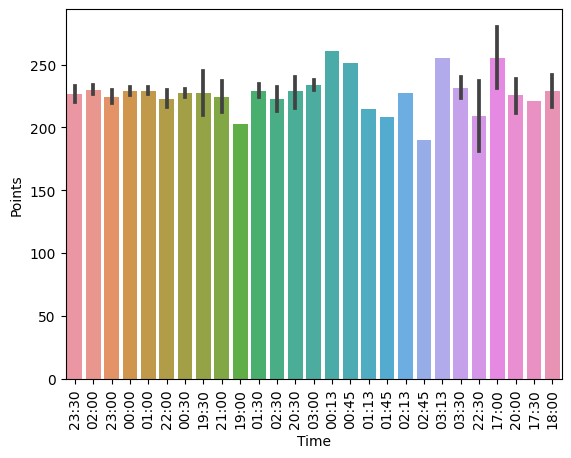

In [19]:
sns.barplot(data=df_clean_reg, x='Time', y = 'Points')
plt.xticks(rotation=90)
plt.show()

In [20]:
df_clean_reg

,Round Number,Home Team,Away Team,Day,Time,Home_result,Away_result,Points
0,1,Boston Celtics,Philadelphia 76ers,18/10/2022,23:30,126.0,117.0,243.0
1,1,Golden State Warriors,Los Angeles Lakers,19/10/2022,02:00,123.0,109.0,232.0
2,1,Detroit Pistons,Orlando Magic,19/10/2022,23:00,113.0,109.0,222.0
3,1,Indiana Pacers,Washington Wizards,19/10/2022,23:00,107.0,114.0,221.0
4,1,Atlanta Hawks,Houston Rockets,19/10/2022,23:30,117.0,107.0,224.0
...,...,...,...,...,...,...,...,...
816,16,Brooklyn Nets,Phoenix Suns,08/02/2023,00:30,112.0,116.0,228.0
817,16,New Orleans Pelicans,Atlanta Hawks,08/02/2023,00:30,116.0,107.0,223.0
818,16,Memphis Grizzlies,Chicago Bulls,08/02/2023,01:00,104.0,89.0,193.0
819,16,Denver Nuggets,Minnesota Timberwolves,08/02/2023,03:00,146.0,112.0,258.0


In [21]:
df_clean_class = df_clean_reg.copy()

In [22]:
df_clean_class.describe()

,Round Number,Home_result,Away_result,Points
count,820.000000,820.000000,820.000000,820.000000
mean,8.263415,115.808537,112.828049,228.636585
std,4.643467,11.771478,11.224143,18.767575
min,1.000000,82.000000,81.000000,169.000000
25%,4.000000,108.000000,105.000000,216.000000
50%,8.000000,116.000000,113.000000,229.000000
75%,12.000000,124.000000,121.000000,241.000000
max,16.000000,153.000000,150.000000,284.000000


In [23]:
def classification_points(points, point_odd):
    if points > point_odd:
        return 1
    return 0

df_clean_class['Points'] = df_clean_class['Points'].apply(lambda x: classification_points(x, 220))

In [24]:
df_clean_class

,Round Number,Home Team,Away Team,Day,Time,Home_result,Away_result,Points
0,1,Boston Celtics,Philadelphia 76ers,18/10/2022,23:30,126.0,117.0,1
1,1,Golden State Warriors,Los Angeles Lakers,19/10/2022,02:00,123.0,109.0,1
2,1,Detroit Pistons,Orlando Magic,19/10/2022,23:00,113.0,109.0,1
3,1,Indiana Pacers,Washington Wizards,19/10/2022,23:00,107.0,114.0,1
4,1,Atlanta Hawks,Houston Rockets,19/10/2022,23:30,117.0,107.0,1
...,...,...,...,...,...,...,...,...
816,16,Brooklyn Nets,Phoenix Suns,08/02/2023,00:30,112.0,116.0,1
817,16,New Orleans Pelicans,Atlanta Hawks,08/02/2023,00:30,116.0,107.0,1
818,16,Memphis Grizzlies,Chicago Bulls,08/02/2023,01:00,104.0,89.0,0
819,16,Denver Nuggets,Minnesota Timberwolves,08/02/2023,03:00,146.0,112.0,1


In [25]:
df_clean_class['Points'].value_counts(normalize=True)

1    0.664634
0    0.335366
Name: Points, dtype: float64

In [26]:
# neural network - regrission
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve


In [27]:
df_clean_reg = pd.get_dummies(df_clean_reg,columns = ['Home Team','Away Team','Day','Time'])
df_clean_class = pd.get_dummies(df_clean_class,columns = ['Home Team','Away Team','Day','Time'])

In [28]:
x_data_reg = df_clean_reg.drop(['Points','Home_result','Away_result'], axis=1)
y_data_reg = df_clean_reg['Points']

x_data_class = df_clean_class.drop(['Points','Home_result','Away_result'], axis=1)
y_data_class = df_clean_class['Points']

In [29]:
scaler_1 = StandardScaler()
scaler_2 = MinMaxScaler()
scaler = scaler_2

x_data = scaler.fit_transform(x_data_reg)
y_data = np.array(y_data_reg)
y_data = y_data.reshape(-1,1)
y_data = scaler.fit_transform(y_data)


In [30]:
x_data

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10)

In [32]:
# Linear Regresssion
model_1 = LinearRegression()
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_test)

In [33]:
score = r2_score(y_pred,y_test)
score

-0.013405201834200353

In [34]:
# DecisionTreeRegressor
model_2 = DecisionTreeRegressor()
model_2.fit(x_train,y_train)
y_pred_tree = model_2.predict(x_test)

In [35]:
score = mean_absolute_error(y_pred_tree,y_test)
score

0.17667020148462353

In [36]:
cross_val_score(model_2,x_test,y_test, cv=3)

array([-0.86610985, -1.47149368, -1.61522341])

In [37]:
scaler_1 = StandardScaler()
scaler_2 = MinMaxScaler()
scaler = scaler_2

x_data_class = scaler.fit_transform(x_data_class)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_data_class, y_data_class, test_size=0.2, random_state=25)

In [39]:
# SVM
model_3 = SVC()
model_3.fit(x_train,y_train)
y_pred_svm = model_3.predict(x_test)

In [40]:
score_svm_acc = accuracy_score(y_pred_svm, y_test)
score_svm_rec = recall_score(y_pred_svm, y_test)

In [41]:
# DecisionTreeClassifier
model_4 = DecisionTreeClassifier()
model_4.fit(x_train, y_train)
y_pred_tree_class = model_4.predict(x_test)

In [42]:
score_tree_acc = accuracy_score(y_pred_tree_class, y_test)
score_tree_rec = recall_score(y_pred_tree_class, y_test)
score_tree_acc

0.6219512195121951

In [47]:
tn,fp,fn,tp = confusion_matrix(y_pred_tree_class,y_test).ravel()

In [55]:
sum = tn+fp+fn+tp
prob_tp = tp/sum
prob_fp = fp/sum
prob_tn = tn/sum
prob_fn = fn/sum
prob_tp, prob_tn, prob_fp, prob_fn

(0.47560975609756095,
 0.14634146341463414,
 0.24390243902439024,
 0.13414634146341464)

In [44]:
confusion_matrix(y_pred_tree_class,y_test)

array([[24, 40],
       [22, 78]], dtype=int64)

In [56]:
aporte = 10
odd = 3.5
value = (prob_fp + prob_fn)*aporte*(odd-1) - (prob_tp + prob_tn)*aporte
value

1930.0

In [54]:
odd = (prob_fp + prob_fn)/(prob_tp + prob_tn) + 1
odd

1.607843137254902